# Applying CNN & Keras for classifing images on the MNIST dataset 

<b>Importing required Libraries<b/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<b>Import MNIST Dataset<b/>

In [2]:
from tensorflow.keras.datasets import mnist

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
y_train.shape

(60000,)

In [17]:
single_image = X_train[0]

In [18]:
single_image.shape

(28, 28)

In [19]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<b>Visualzing each image<b/>

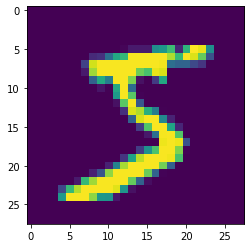

In [20]:
plt.imshow(single_image)

In [21]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<b>Do One-Hot Encoding<b/>

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, 10)

In [25]:
print(single_image.max()) 
print(single_image.min())

255
0


<b>Scaling train and test set<b/>

In [26]:
X_train = X_train/255
X_test = X_test/255

In [27]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

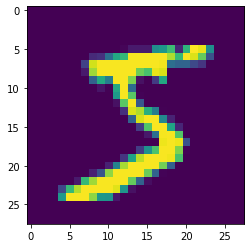

In [28]:
scaled_image = X_train[0]
plt.imshow(scaled_image)

In [29]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<b>Datat Preprocessing: Add 1 more dimesnion to dataset for the color channel<b/>

In [30]:
#batch_size, width, height, color_channels
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

<b>Model creation<b/>

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
28*28

784

In [40]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

#Ouput layer->1neuron per class, Softmax for multiclass problem
#Binary classificcation-> activation= sigmoid, Dense(1)
model.add(Dense(10, activation='softmax'))

#keras.io/metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
#Hyperparameters based on data: input_shape=(28,28,1), model.add(Flatten()), model.add(Dense(10, activation='softmax')) ->There is a correct value for them

In [43]:
#Hyperparameters for experimentation: model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu' )), model.add(MaxPool2D(pool_size=(2,2))), model.add(Dense(128, activation='relu')) 


<b>Adding early stopping<b/>

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

<b>Training the model<b/>

In [46]:
model.fit(x=X_train, y=y_cat_train, epochs=10, callbacks=[early_stop], validation_data=(X_test, y_cat_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 778us/sample - loss: 0.1407 - accuracy: 0.9579 - val_loss: 0.0568 - val_accuracy: 0.9813
Epoch 2/10
60000/60000 [==============================] - 37s 621us/sample - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.0464 - val_accuracy: 0.9854
Epoch 3/10
60000/60000 [==============================] - 37s 614us/sample - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0446 - val_accuracy: 0.9859
Epoch 4/10
60000/60000 [==============================] - 37s 619us/sample - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0431 - val_accuracy: 0.9861
Epoch 5/10
60000/60000 [==============================] - 37s 617us/sample - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0354 - val_accuracy: 0.9886
Epoch 6/10
60000/60000 [==============================] - 39s 643us/sample - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0395 - val_accuracy: 0.9877


<b>Visualizing model metrics<b/>

In [48]:
metrics = pd.DataFrame(model.history.history)

In [49]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140714,0.957883,0.056751,0.9813
1,0.048084,0.985167,0.046443,0.9854
2,0.031711,0.989917,0.044551,0.9859
3,0.020436,0.993367,0.043075,0.9861
4,0.014747,0.995300,0.035410,0.9886
5,0.010486,0.996583,0.039466,0.9877


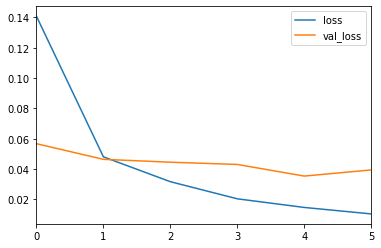

In [52]:
metrics[['loss', 'val_loss']].plot()

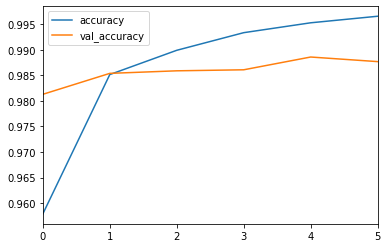

In [53]:
metrics[['accuracy', 'val_accuracy']].plot()

In [56]:
model.metrics_names

['loss', 'accuracy']

In [58]:
model.evaluate(X_test, y_cat_test, verbose=0)
#Loss is the result of 'categorical_crossentropy' function

[0.03946603383922557, 0.9877]

<b>Do predictions & reporting metrics<b/>

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
predictions = model.predict_classes(X_test)

In [68]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [69]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.97      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [71]:
print(confusion_matrix(y_test, predictions))

[[ 976    0    0    1    0    0    2    0    1    0]
 [   0 1130    0    1    0    0    2    0    1    1]
 [   4    2 1006    0    1    0    3    5   11    0]
 [   0    0    0  994    0   11    0    1    2    2]
 [   0    0    0    0  969    0    3    0    0   10]
 [   1    0    0    4    0  883    3    0    1    0]
 [   4    1    0    0    2    1  949    0    1    0]
 [   0    2    4    0    1    0    0 1014    1    6]
 [   4    2    0    1    0    1    1    0  961    4]
 [   0    0    0    0    4    5    0    3    2  995]]


<b>Visualize Metrics<b/>

In [73]:
import seaborn as sns

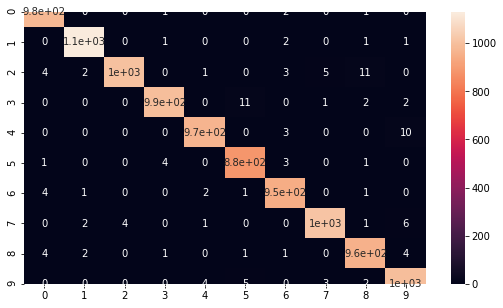

In [75]:
plt.figure(figsize=(9,5))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

<b>Predicting/Classifying single images<b/>

In [76]:
new_image = X_test[0].reshape(28,28)

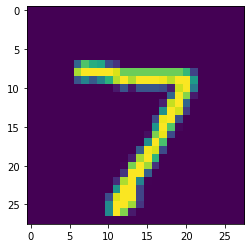

In [77]:
plt.imshow(new_image)

In [78]:
#reshape image based on batch_size, height, width, color_channels
new_prediction = model.predict_classes(new_image.reshape(1,28,28,1))

In [79]:
new_prediction

array([7], dtype=int64)

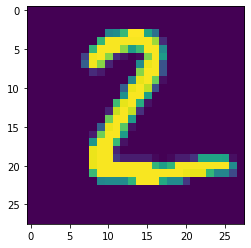

In [82]:
new_image2 = X_test[1]
plt.imshow(new_image2.reshape(28,28))

In [83]:
new_prediction2 = model.predict_classes(new_image2.reshape(1,28,28,1))

In [84]:
new_prediction2

array([2], dtype=int64)

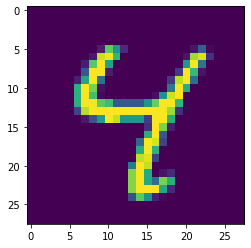

In [85]:
new_image3 = X_test[6].reshape(28,28)
plt.imshow(new_image3)

In [86]:
new_prediction3 = model.predict_classes(new_image3.reshape(1,28,28,1))
new_prediction3

array([4], dtype=int64)

<b>As we see from above indiviudal samples as well as prediction metrics, our model is predicting values with almost 100% accuracy<b/>